# 1. Exploratory Data Analysis

In [1]:
# Import libraries

# Utilities
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 300

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# SKlearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn import svm

# Stats
from scipy import stats
import time

In [2]:
# Read Data File

df = pd.read_csv('winequality-white.csv')
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6


In [3]:
df.shape

(4898, 1)

In [4]:
df.columns

## The dataset is unusable at this point due the values being only in one column. 
## The data will be processed in the next segment.

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

# 2. Data Processing

In [5]:
# Split the column 0 into individual columns

df[[
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
    'quality'
]] = df.iloc[:,0].str.split(';', expand=True)

# Drop 1st column
df = df.drop(df.columns[[0]], axis=1)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


# 3. Data Cleaning

In [6]:
# Finding NA values

df.isna().sum().sort_values()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Finding the data type

df.dtypes

## Conversion to float is required to do Regression

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object

In [8]:
# Convert to best possible type 

df = df.astype({
    "fixed acidity": float, 
    "volatile acidity": float, 
    "citric acid": float, 
    "residual sugar": float, 
    "chlorides": float, 
    "free sulfur dioxide": float, 
    "total sulfur dioxide": float, 
    "density": float, 
    "pH": float, 
    "sulphates": float, 
    "alcohol": float, 
    "quality": int,

})
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

<AxesSubplot: >

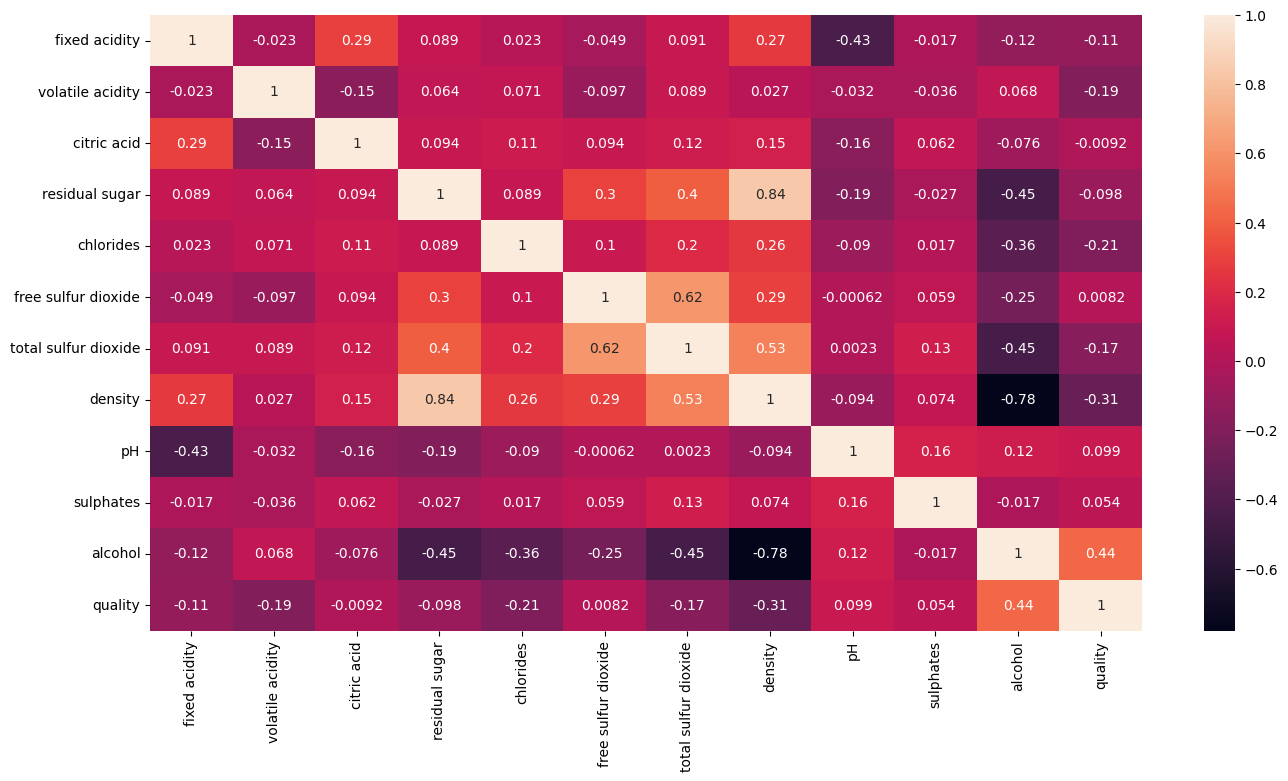

In [9]:
# Display correlation of data frame

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

# We will use SelectKbest to recommend the attributes that have an impact on wine quality.

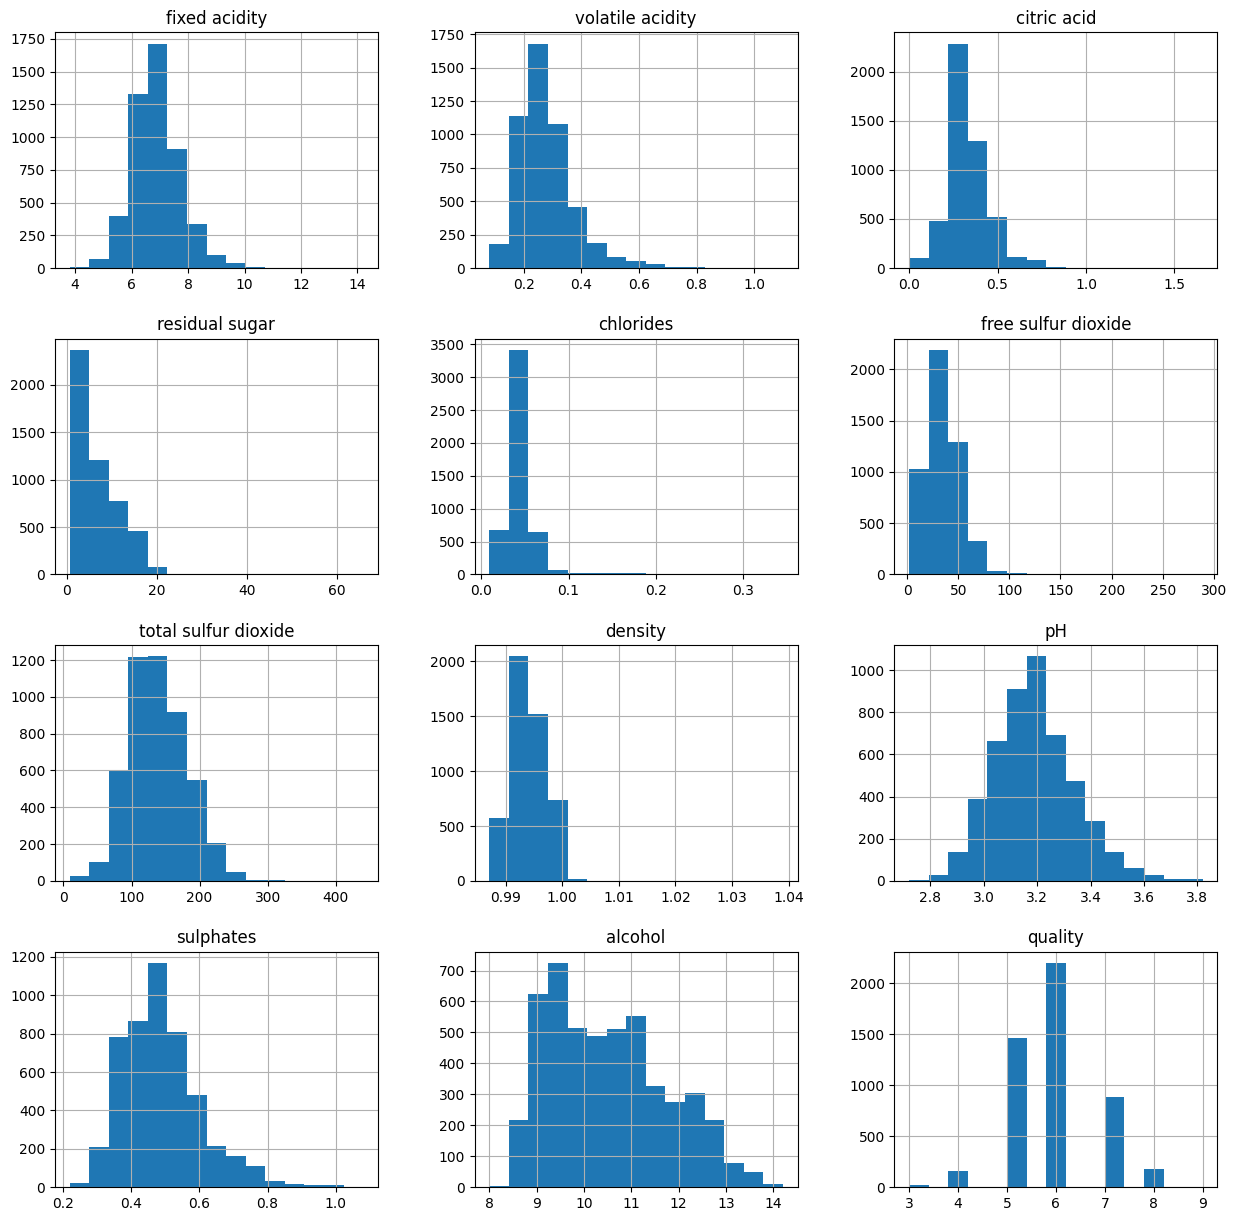

In [10]:
# Display Histogram

df.hist(bins=15,figsize=(15,15))
# display histogram
plt.show()

# From this diagram, we can observe that lower quality wines have higher critic acid, residual sugar, chrlorides, and is denser.
# This suggests that lower quality wines have more impurities in them, perhaps due to cheaper ingredients to cut cost.

In [11]:
# Summary Statistics

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# 4. Model Training & Evaluation

In [13]:
# Add a classifier to categorize wine whether is it good or not (using quality >=7 as an example)

df['best quality'] = [ 1 if x>=7 else 0 for x in df.quality] 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [93]:
# Using Feature Selection to find recommended columns if it is a good wine or not.

from sklearn.feature_selection import chi2, f_regression

X = df.loc[:,~df.columns.isin(['best quality', 'quality'])]
y = df[['best quality']]
selector = SelectKBest(chi2, k=4)
selector.fit_transform(X, y)

print('The 4 recommended attributes are:', X.columns[selector.get_support(indices=True)])

The 4 recommended attributes are: Index(['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide',
       'alcohol'],
      dtype='object')


In [35]:
# Divide the independent and dependent variable into two separate variables.

X = df[['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide','alcohol']]
y = df['best quality']

In [37]:
# Apply normalization

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
X.head()

,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol
0,0.308282,0.149826,0.373550,0.129032
1,0.015337,0.041812,0.285383,0.241935
2,0.096626,0.097561,0.204176,0.338710
3,0.121166,0.156794,0.410673,0.306452
4,0.121166,0.156794,0.410673,0.306452


## 4.1 Supervised - Logistic Regression

In [38]:
# Logistic Regression 

# Initialize Time for calculation time
t0=time.time()

# Initialize the Model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)
log_reg = LogisticRegression(max_iter = 500) # default - 100 cycles

# Train the Model
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Generate Scores
score = accuracy_score(y_test,y_pred)

print('Accuracy :',round(score*100,2), '%')
print('Time taken :' , round(time.time()-t0,2), 'S')

Accuracy : 79.49 %
Time taken : 0.02 S


In [39]:
# Generate Comparison Dataframe

compare_df = pd.DataFrame({"Actuals": y_test,
                          "Predicted": y_pred})
compare_df.head(10)

,Actuals,Predicted
4656,1,0
3659,1,1
907,1,0
4352,0,0
3271,1,0
4632,0,0
2244,0,0
1924,0,0
3801,0,0
2634,0,0


Confusion Matrix = 
 [[724  29]
 [172  55]]


<AxesSubplot: >

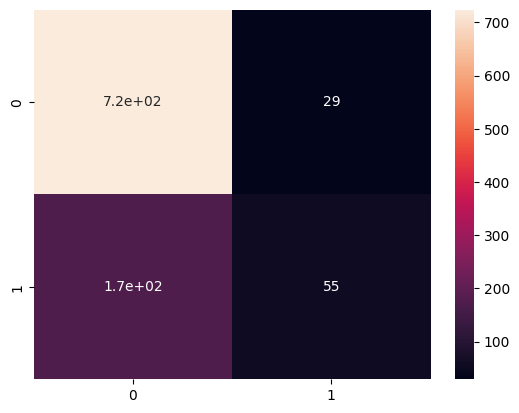

In [40]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix = \n", str(conf_mat))

# Heat map of conf_mat

sns.heatmap(conf_mat, annot=True)

In [41]:
# Classification Report of Logistic Regression

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       753
           1       0.65      0.24      0.35       227

    accuracy                           0.79       980
   macro avg       0.73      0.60      0.62       980
weighted avg       0.77      0.79      0.76       980



## 4.2 Supervised - Naive Bayes

In [42]:
# Naive Bayes Classifier

# Initialize Time for calculation time
t0=time.time()

# Initialize the Model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)
classify = GaussianNB()

# Train the model
classify.fit(X_train, y_train)
y_pred = classify.predict(X_test)

# Generate Scores
score = accuracy_score(y_test,y_pred)

print('Accuracy :',round(score*100,2), '%')
print('Time taken :' , round(time.time()-t0,2), 'S')

Accuracy : 76.73 %
Time taken : 0.0 S


In [43]:
# Generate Comparison Dataframe

compare_df = pd.DataFrame({"Actuals": y_test,
                          "Predicted": y_pred})
compare_df.head(10)

,Actuals,Predicted
4656,1,0
3659,1,1
907,1,1
4352,0,0
3271,1,1
4632,0,0
2244,0,0
1924,0,0
3801,0,0
2634,0,0


Confusion Matrix = 
 [[664  89]
 [139  88]]


<AxesSubplot: >

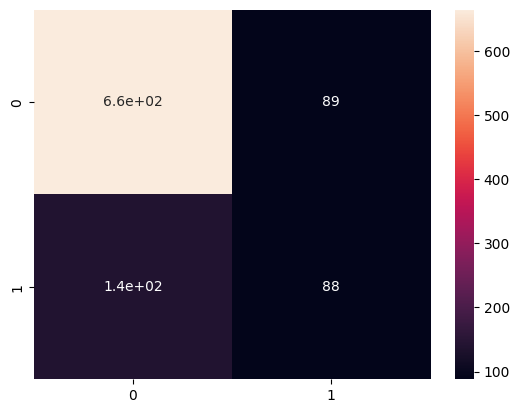

In [44]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix = \n", str(conf_mat))

# Heat map of conf_mat

sns.heatmap(conf_mat, annot=True)

In [45]:
# Classification Report of Naive Bayes model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       753
           1       0.50      0.39      0.44       227

    accuracy                           0.77       980
   macro avg       0.66      0.63      0.64       980
weighted avg       0.75      0.77      0.76       980



## 4.3 Supervised - Support Vector Machine (SVM)

In [46]:
# SVM

# Initialize Time for calculation time
t0=time.time()

# Initialize the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)
svm_classifier = svm.SVC()

# Train the model
svm_classifier.fit(X_train, y_train); #train input and training output
y_pred = svm_classifier.predict(X_test)

# Generate Scores
score = accuracy_score(y_test,y_pred)

print('Accuracy :',round(score*100,2), '%')
print('Time taken :' , round(time.time()-t0,2), 'S')

Accuracy : 80.1 %
Time taken : 0.32 S


In [47]:
# Generate Comparison Dataframe

compare_df = pd.DataFrame({"Actuals": y_test,
                          "Predicted": y_pred})
compare_df.head(10)

,Actuals,Predicted
4656,1,0
3659,1,1
907,1,0
4352,0,0
3271,1,0
4632,0,0
2244,0,0
1924,0,0
3801,0,0
2634,0,0


Confusion Matrix = 
 [[730  23]
 [172  55]]


<AxesSubplot: >

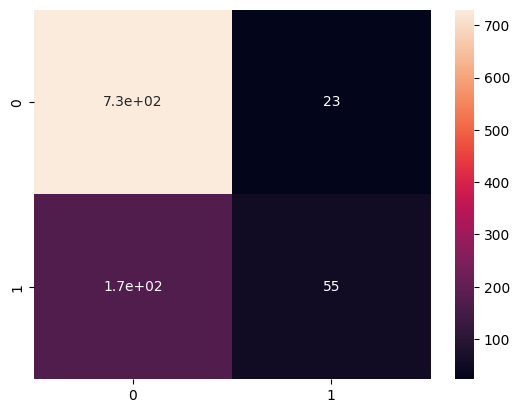

In [48]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix = \n", str(conf_mat))

# Heat map of conf_mat

sns.heatmap(conf_mat, annot=True)

In [49]:
# Classification Report of SVM

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       753
           1       0.71      0.24      0.36       227

    accuracy                           0.80       980
   macro avg       0.76      0.61      0.62       980
weighted avg       0.79      0.80      0.76       980



## 4.4 Supervised - Random Forest Classifier

In [50]:
# Random Forest

# Initialize Time for calculation time
t0=time.time()

# Initiatlize the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)
RF = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)

# Train the model
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

# Generate Scores
score = accuracy_score(y_test,y_pred)

print('Accuracy :',round(score*100,2), '%')
print('Time taken :' , round(time.time()-t0,2), 'S')

Accuracy : 86.53 %
Time taken : 0.09 S


In [51]:
# Generate Comparison Dataframe

compare_df = pd.DataFrame({"Actuals": y_test,
                          "Predicted": y_pred})
compare_df.head(10)

,Actuals,Predicted
4656,1,1
3659,1,1
907,1,0
4352,0,0
3271,1,1
4632,0,0
2244,0,0
1924,0,0
3801,0,0
2634,0,0


Confusion Matrix = 
 [[710  43]
 [ 89 138]]


<AxesSubplot: >

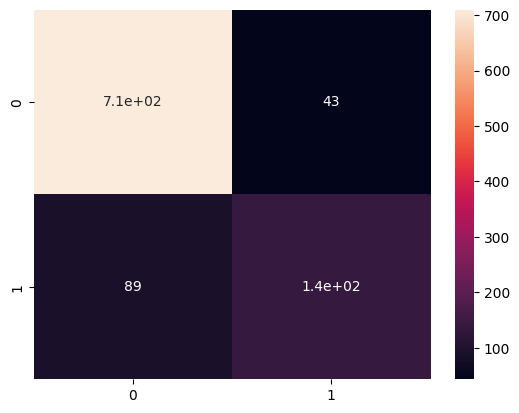

In [52]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix = \n", str(conf_mat))

# Heat map of conf_mat

sns.heatmap(conf_mat, annot=True)

In [53]:
# Classification Report of Random Forest Classification

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       753
           1       0.76      0.61      0.68       227

    accuracy                           0.87       980
   macro avg       0.83      0.78      0.80       980
weighted avg       0.86      0.87      0.86       980



### Conclusion

The wine quality dataset is a sample of white wine and its corresponding quality value.Using 4 different supervised machine learning models, it was observed that all 4 models scored particularly well in accuracy (>=75%) and kept computational time low.

However, upon further inspection, Logistic, Naive Bayes & SVM did not do particularly well in predicting 'Good' quality wines (quality >= 7). For example, the logistic & SVM model scored 24% while the Naive Bayes scored 39% in recall score.

This was due to the models predicting a high number of false negatives, incorrectly classifying the wine as not good quality when it was of good quality.

The last model, Random Forest was able to get a high accuracy of 86% and an acceptable recall score of 61% in predicting whether the quality of wine is good or not.
